1.Basic (head,tail,describe,info,dtypes) 
Shape of Dataframe 
Check Null values and deal with it 
Drop duplicats 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')

First 10 Rows Of Dataframe

In [3]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


Shape of The Dataframe

In [4]:
matches.shape

(1095, 20)

Columns Name

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Datatypes of Each Columns

In [6]:
matches.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

Null Values in Every Columns

In [7]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Deal With Null Values

In [8]:
matches_null_city=matches.loc[matches.city.isnull()==True]

In [9]:
matches_null_city.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary


In [10]:
matches_null_city.venue.value_counts()

venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

In [11]:
def city_null(row):
    if row.venue=='Dubai International Cricket Stadium':
        return 'Dubai'
    elif row.venue=='Sharjah Cricket Stadium':
        return 'Sharjah'
    else:
        return row.city

In [12]:
matches['city']=matches.apply(city_null,axis=1)

In [13]:
matches.city.isnull().sum()

0

In [14]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [15]:
matches.fillna({'method': 'No'},inplace=True)

In [16]:
matches['method'].isnull().sum()

0

Deal With Duplicate

In [17]:
matches.duplicated().sum()

0

2.Show dataframe for every year and do basic operation,shape of dataframe(take year input from user) 

In [18]:
matches_copy=matches

In [19]:
matches_copy.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen


In [20]:
import datetime

In [21]:
matches_copy['date']=pd.to_datetime(matches['date'])
matches_copy['year']=matches_copy['date'].dt.year
matches_copy['month']=matches_copy['date'].dt.month
matches_copy['day']=matches_copy['date'].dt.day

In [22]:
matches_copy.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen,2008,4,18


In [23]:
matches_copy.year.value_counts().sort_index()

year
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
Name: count, dtype: int64

In [24]:
def basic_oper_yearwise():
    try:
        Year=int(input('Year='))
    except ValueError:
        print('Give integer input between 2008 to 2024')
        basic_oper_yearwise()
    else:
        if 2008<=Year<=2024:
            print(f'\033[1mHEAD OF THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].head(2))
            print(f'\033[1mTAIL OF THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].tail(2))
            print('\033[1mALL COLUMNS NAME:-\033[0m')
            display(matches_copy.columns)
            print(f'\033[1mSHAPE OF THE DATASET FOR YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].shape)
            print(f'\033[1mDESCRIBE ABOUT THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].describe())
            print(f'\033[1mINFORMATION ABOUT THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].info())
        else:
            print('Give input between 2008 to 2024')
            basic_oper_yearwise()

In [25]:
basic_oper_yearwise()

Year= 2017


HEAD OF THE DATASET ON YEAR 2017:-


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
577,1082591,2017,Hyderabad,2017-04-05,League,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,...,35.0,208.0,20.0,N,No,AY Dandekar,NJ Llong,2017,4,5
578,1082592,2017,Pune,2017-04-06,League,SPD Smith,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,...,7.0,185.0,20.0,N,No,A Nand Kishore,S Ravi,2017,4,6


TAIL OF THE DATASET ON YEAR 2017:-


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
634,1082649,2017,Bangalore,2017-05-19,Qualifier 2,KV Sharma,M Chinnaswamy Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,6.0,108.0,20.0,N,No,NJ Llong,Nitin Menon,2017,5,19
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,...,1.0,130.0,20.0,N,No,NJ Llong,S Ravi,2017,5,21


ALL COLUMNS NAME:-


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

SHAPE OF THE DATASET FOR YEAR 2017:-


(59, 23)

DESCRIBE ABOUT THE DATASET ON YEAR 2017:-


,id,date,result_margin,target_runs,target_overs,year,month,day
count,5.900000e+01,59,58.000000,59.00000,59.000000,59.0,59.000000,59.000000
mean,1.082621e+06,2017-04-26 06:30:30.508474624,17.103448,165.40678,19.762712,2017.0,4.389831,14.576271
min,1.082591e+06,2017-04-05 00:00:00,1.000000,48.00000,6.000000,2017.0,4.000000,1.000000
25%,1.082606e+06,2017-04-15 12:00:00,6.000000,154.50000,20.000000,2017.0,4.000000,8.000000
50%,1.082621e+06,2017-04-27 00:00:00,7.500000,164.00000,20.000000,2017.0,4.000000,14.000000
75%,1.082636e+06,2017-05-06 12:00:00,15.000000,187.00000,20.000000,2017.0,5.000000,20.500000
max,1.082650e+06,2017-05-21 00:00:00,146.000000,231.00000,20.000000,2017.0,5.000000,30.000000
std,1.761304e+01,NaN,25.345812,34.21641,1.822645,0.0,0.491898,8.015510


INFORMATION ABOUT THE DATASET ON YEAR 2017:-
<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 577 to 635
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               59 non-null     int64         
 1   season           59 non-null     object        
 2   city             59 non-null     object        
 3   date             59 non-null     datetime64[ns]
 4   match_type       59 non-null     object        
 5   player_of_match  59 non-null     object        
 6   venue            59 non-null     object        
 7   team1            59 non-null     object        
 8   team2            59 non-null     object        
 9   toss_winner      59 non-null     object        
 10  toss_decision    59 non-null     object        
 11  winner           59 non-null     object        
 12  result           59 non-null     object        
 13  result_margin    58 non-null     float64       
 14  t

None

3.How many time a team play playoff 

In [26]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [27]:
matches_copy.replace(to_replace='Elimination Final',value='Eliminator',inplace=True)

In [28]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Eliminator              14
Qualifier 2             14
Semi Final               6
3rd Place Play-Off       1
Name: count, dtype: int64

In [29]:
playoff_match_team1=matches_copy.loc[(matches_copy.match_type=='Semi Final') | (matches_copy.match_type=='Qualifier 1') | \
    (matches_copy.match_type=='Eliminator')].loc[:,['year','team1']]
playoff_match_team1['team']=playoff_match_team1['team1']
playoff_match_team1.drop('team1',axis=1,inplace=True)
playoff_match_team2=matches_copy.loc[(matches_copy.match_type=='Semi Final') | (matches_copy.match_type=='Qualifier 1') | \
    (matches_copy.match_type=='Eliminator')].loc[:,['year','team2']]
playoff_match_team2['team']=playoff_match_team2['team2']
playoff_match_team2.drop('team2',axis=1,inplace=True)
playoff_match_team=pd.concat([playoff_match_team1,playoff_match_team2],ignore_index=True)

In [30]:
def playoff_team():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=playoff_match_team,y='team',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Give input years betwween 2008 to 2024 or all')
            playoff_team()
        else:
            if(2008<=Year<=2024):
                sns.countplot(data=playoff_match_team.loc[playoff_match_team['year']==Year],y='team',orient='h')
            else:
                print('Give input between 2008 to 2024')
                playoff_team()
    return 

Year= all


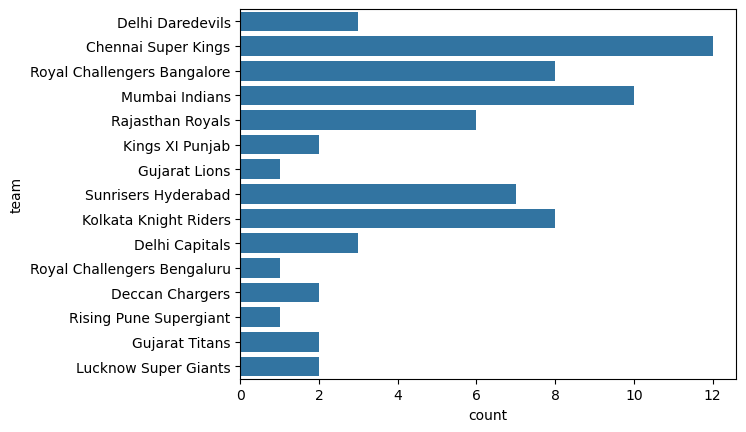

In [31]:
playoff_team()

4.How many time a team play final 

In [32]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Eliminator              14
Qualifier 2             14
Semi Final               6
3rd Place Play-Off       1
Name: count, dtype: int64

In [33]:
final_match_team1=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','team1']]
final_match_team2=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','team2']]
final_match_team1['team']=final_match_team1['team1']
final_match_team1.drop('team1',axis=1,inplace=True)
final_match_team2['team']=final_match_team2['team2']
final_match_team2.drop('team2',axis=1,inplace=True)
final_match_team=pd.concat([final_match_team1,final_match_team2],ignore_index=True)

In [34]:
def final_team():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=final_match_team,y='team',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Choose all or integer year between 2008 to 2024')
            final_team()
        else:
            if 2008<=Year<=2024:
                sns.countplot(data=final_match_team.loc[final_match_team.year==Year],y='team',orient='h')
            else:
                print('Give input between 2008 to 2024')
                final_team()

Year= all


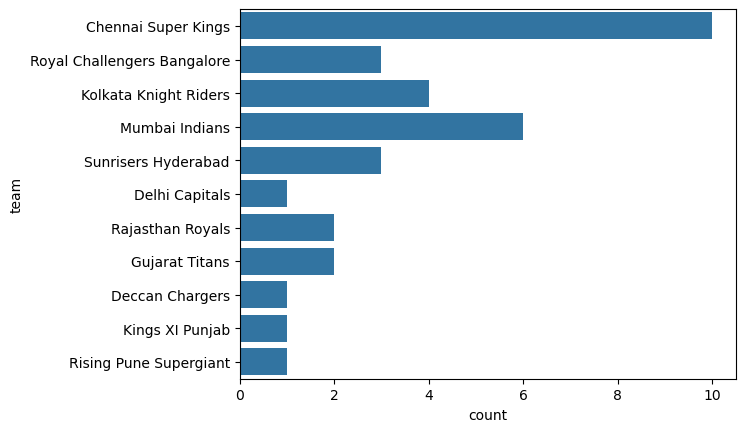

In [35]:
final_team()

5.How many time a team win final 

In [36]:
matches_copy.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

In [37]:
final_winner_team=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','winner']]
final_winner_team['index']=final_winner_team['year']
final_winner_team.set_index('index',inplace=True)

In [38]:
final_winner_team.head(2)

,year,winner
index,,
2008,2008,Rajasthan Royals
2009,2009,Deccan Chargers


In [39]:
def final_winner():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=final_winner_team,y='winner',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Choose all or integer year between 2008 to 2024')
            final_winner()
        else:
            if 2008<=Year<=2024:
                winner=final_winner_team.loc[Year,'winner']
                print(f'Year {Year} champion is {winner}')
            else:
                print('Give input between 2008 to 2024')
                final_winner()

Year= all


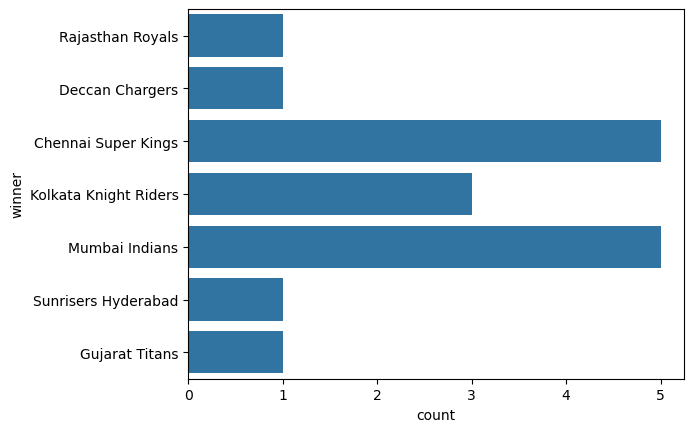

In [40]:
final_winner()

6.city wise player of the match 

In [41]:
matches_copy.city.value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Dubai              46
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Sharjah            28
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [42]:
def city_wise_mvp():
    Set=set(matches_copy['city'])
    for st in Set:
        print(st,end=',')
    City=input('City=')
    if City in Set:
        height=max(0,min(1000,len(matches_copy.loc[matches_copy.city==City]['city'].value_counts())*20))
        plt.figure(figsize=(10,height))
        sns.countplot(data=matches_copy.loc[matches_copy.city==City],y='player_of_match',orient='h')
    else:
        print('\033[1mChoose city from the above list\033[0m')
        city_wise_mvp()

Johannesburg,Nagpur,Kolkata,Mumbai,Durban,Kanpur,Raipur,Guwahati,Ranchi,Cuttack,Abu Dhabi,Indore,Cape Town,Port Elizabeth,Mohali,Pune,Bloemfontein,Chennai,Rajkot,Jaipur,Sharjah,Lucknow,Kimberley,Delhi,Visakhapatnam,Dubai,Navi Mumbai,Dharamsala,Kochi,Ahmedabad,Centurion,Chandigarh,East London,Hyderabad,Bangalore,Bengaluru,

City= Lucknow


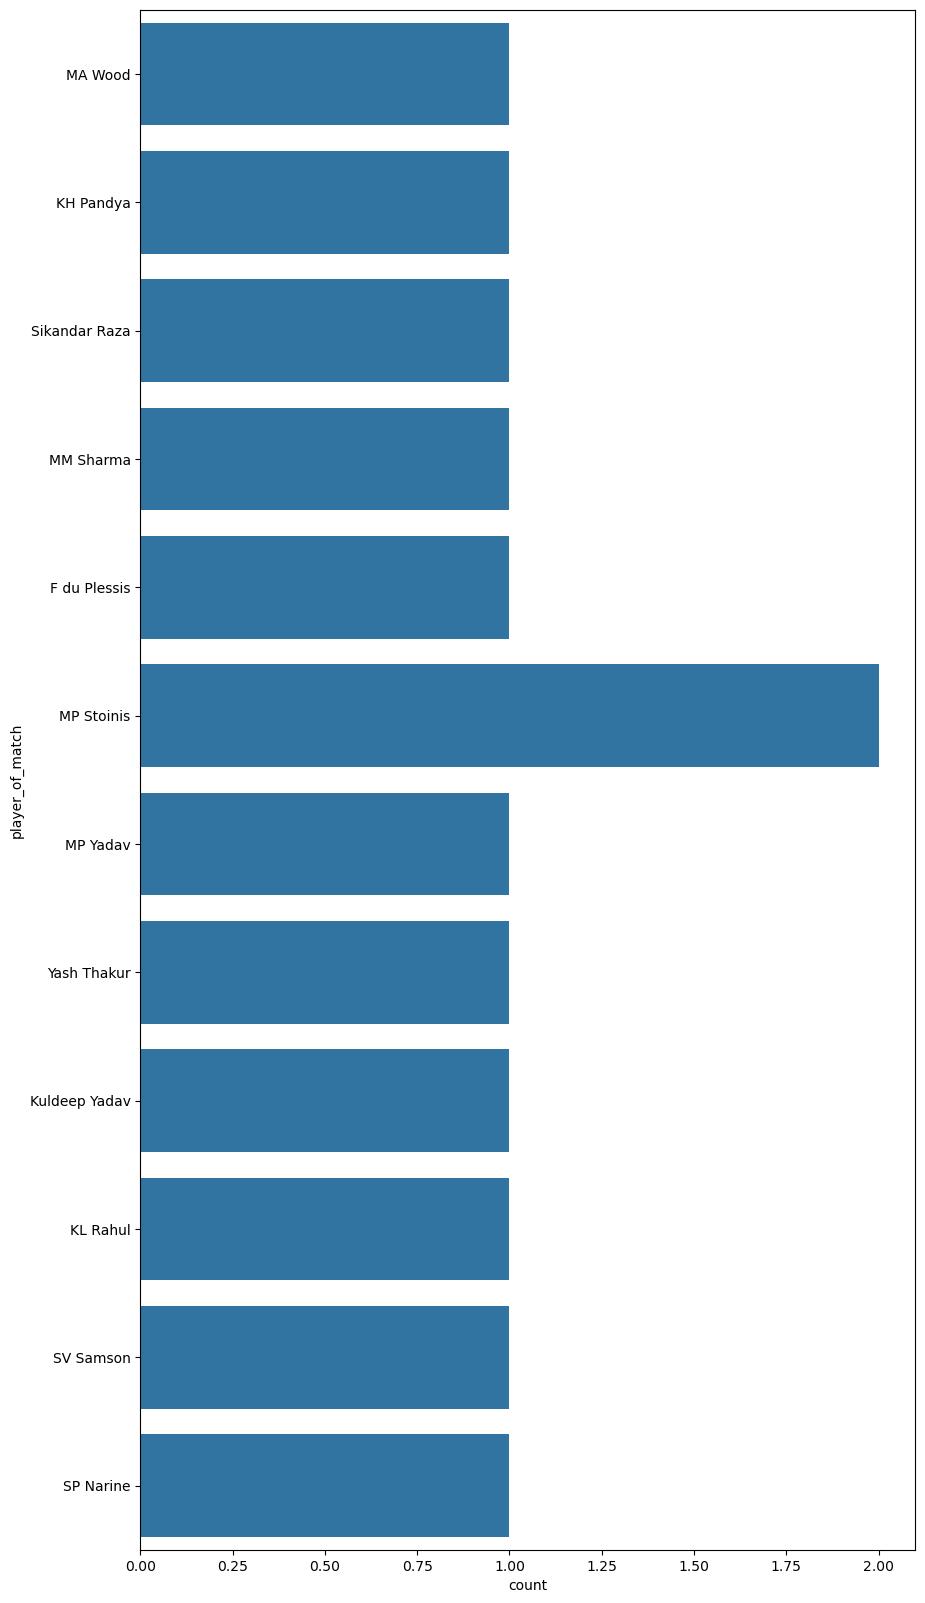

In [43]:
city_wise_mvp()

In [44]:
matches_copy.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

7.Year wise player of the match

In [45]:
def year_wise_mvp():
    Year=input('Year=')
    if Year.lower()=='all':
        height=max(5,min(50,len(matches_copy['player_of_match'].value_counts()*10)))
        plt.figure(figsize=(10,height))
        sns.countplot(data=matches_copy,y='player_of_match',orient='h',gap=0)
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('\033[1mChoose between all or year 2008 to 2024\033[0m')
            year_wise_mvp()
        else:
            if 2008<=Year<=2024:
                height=max(5,min(20,len(matches_copy.loc[matches_copy['year']==Year]['player_of_match'].value_counts()*10)))
                plt.figure(figsize=(10,height))
                sns.countplot(data=matches_copy.loc[matches_copy['year']==Year],y='player_of_match',orient='h')
            else:
                print('\033[1mChoose between all or year 2008 to 2024\033[0m')
                year_wise_mvp()

Year= 2023


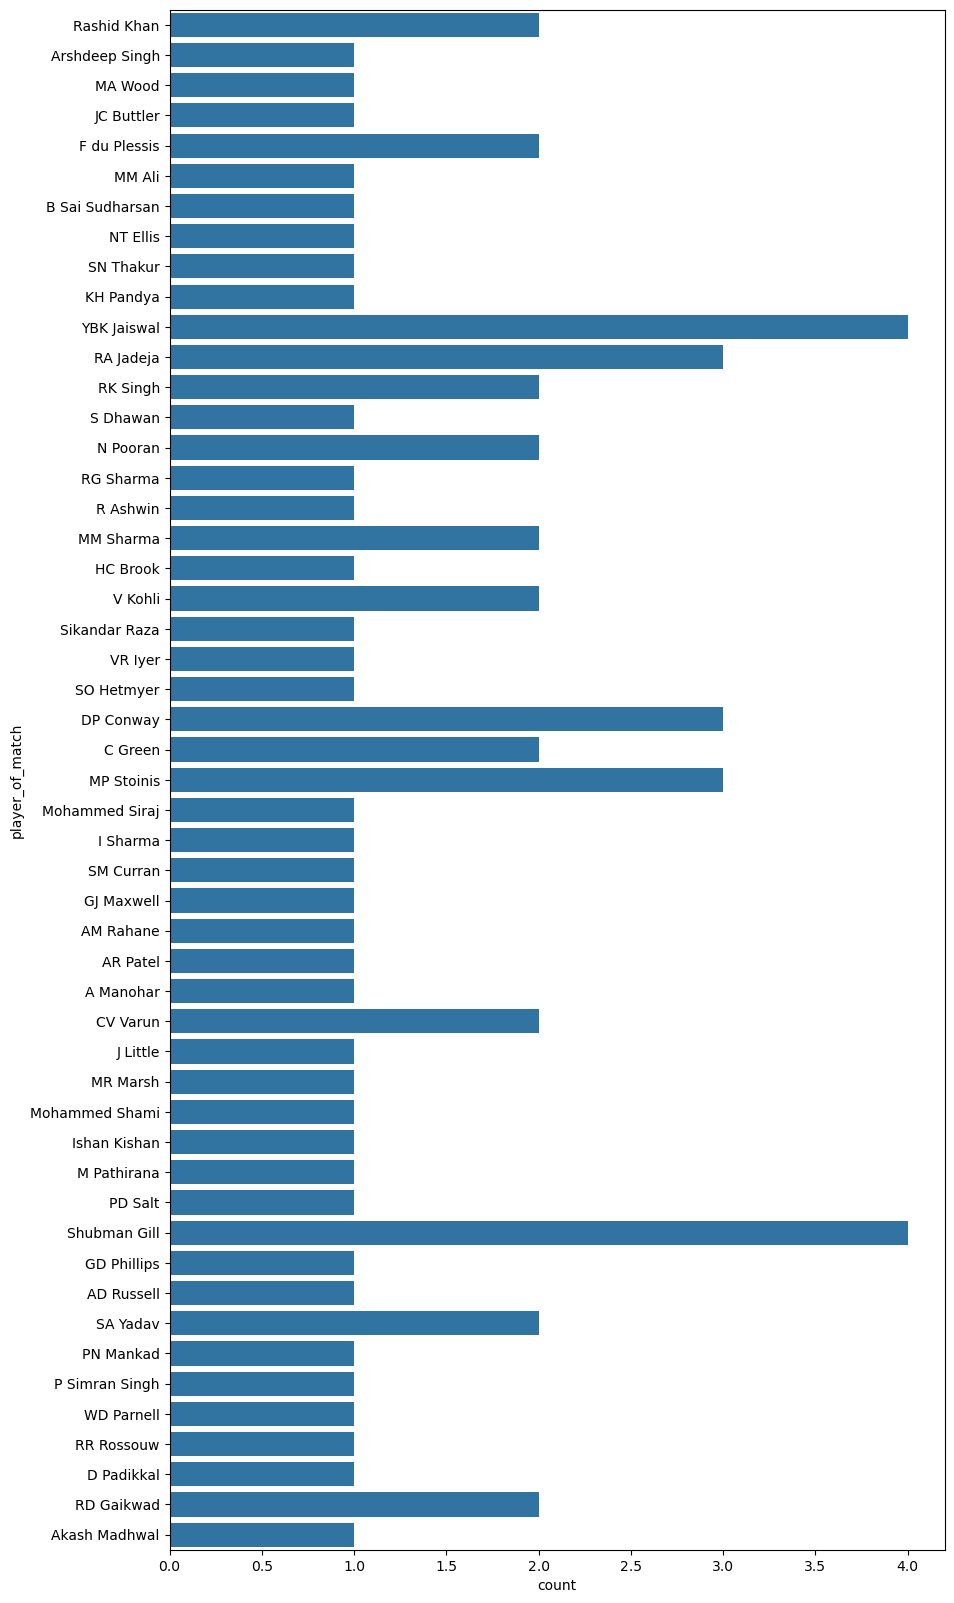

In [46]:
year_wise_mvp()

8.Year wise percentage of winning toss by a team 

In [47]:
matches_copy.loc[matches_copy.year==2008]['team1'].value_counts()

team1
Chennai Super Kings            9
Royal Challengers Bangalore    7
Kings XI Punjab                7
Delhi Daredevils               7
Mumbai Indians                 7
Kolkata Knight Riders          7
Rajasthan Royals               7
Deccan Chargers                7
Name: count, dtype: int64

In [48]:
def year_wise_winning_toss(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(matches_copy['team1'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            z=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & (matches_copy['toss_winner']==Team)])/\
              len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team))])*100
            plt.pie(x=[z,100-z],labels=['Yes','No'],autopct='%1.1f%%')
        else:
            print('Choose Team from the above list')
            year_wise_winning_toss(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            year_wise_winning_toss()
        else:
            if 2008<=Year<=2024:
                Set=set(matches_copy.loc[matches_copy['year']==Year]['team1'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    y=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & (matches_copy['toss_winner']==Team) & \
                      (matches_copy['year']==Year)])/len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
                      (matches_copy['year']==Year)])*100
                    plt.pie(x=[y,100-y],labels=['Yes','No'],autopct='%1.1f%%')
                else:
                    print('Choose Team from the above list')
                    year_wise_winning_toss(Year)
            else:
                print('Choose between all or 2008 to 2024')
                year_wise_winning_toss()

Year= 2016


Mumbai Indians,Gujarat Lions,Rising Pune Supergiants,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Royal Challengers Bangalore,Sunrisers Hyderabad,

Team= Kolkata Knight Riders


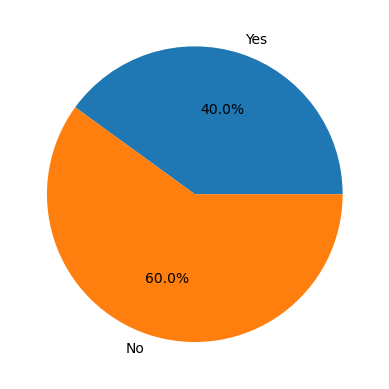

In [49]:
year_wise_winning_toss()

9.Year wise percentage of choosing bat and field 

In [50]:
def year_wise_toss_decision(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(matches_copy['team1'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            z=len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat')])/\
              len(matches_copy.loc[matches_copy['toss_winner']==Team])*100
            plt.pie(x=[z,100-z],labels=['Bat','Field'],autopct='%1.1f%%')
        else:
            print('Choose Team from the above list')
            year_wise_winning_toss(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            year_wise_winning_toss()
        else:
            if 2008<=Year<=2024:
                Set=set(matches_copy.loc[matches_copy['year']==Year]['team1'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    if len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['year']==Year)])==0:
                        print(f"In {Year} {Team} never won a toss in above dataset")
                    else:
                        y=len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat') & \
                        (matches_copy['year']==Year)])/len(matches_copy.loc[(matches_copy['toss_winner']==Team) &\
                                                         (matches_copy['year']==Year)])*100
                        plt.pie(x=[y,100-y],labels=['Bat','Field'],autopct='%1.1f%%')
                else:
                    print('Choose Team from the above list')
                    year_wise_winning_toss(Year)
            else:
                print('Choose between all or 2008 to 2024')
                year_wise_winning_toss()

In [51]:
len(matches_copy.loc[(matches_copy['toss_winner']=='Kolkata Knight Riders') & (matches_copy['year']==2016)])

6

In [52]:
len(matches_copy.loc[((matches_copy['team1']=='Kolkata Knight Riders') | (matches_copy['team2']=='Kolkata Knight Riders')) & (matches_copy['toss_winner']!='Kolkata Knight Riders') & (matches_copy['year']==2016)])

9

In [53]:
len(matches_copy.loc[(matches_copy['toss_winner']=='Kolkata Knight Riders') & (matches_copy['year']==2016) & \
    (matches_copy['toss_decision']!='bat')])

6

Year= 2021


Mumbai Indians,Kolkata Knight Riders,Chennai Super Kings,Delhi Capitals,Rajasthan Royals,Punjab Kings,Royal Challengers Bangalore,Sunrisers Hyderabad,

Team= Kolkata Knight Riders


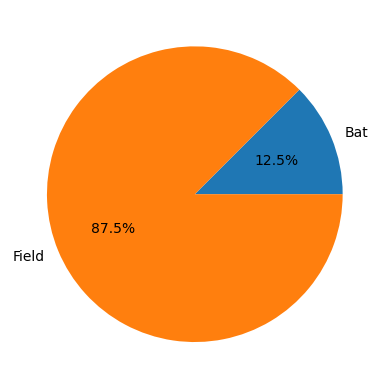

In [54]:
year_wise_toss_decision()

In [55]:
matches_copy.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

10.Year wise percentage of winning after first bat or field

In [56]:
matches_copy['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [57]:
def winning_after_bat_or_field(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)    
    if Year.lower()=='all':
        Set=set(matches_copy['team1'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            a=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='runs')])/\
              len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team))]))*100
                    
            b=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
              (matches_copy['winner']!=Team) & (matches_copy['result']=='wickets')])/\
              len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team))]))*100
            
            c=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat') & \
                  (matches_copy['result']=='tie')]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
                  (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='field') \
                  & (matches_copy['result']=='tie')]))/len(matches_copy.loc[(matches_copy['team1']==Team) | \
                  (matches_copy['team2']==Team)]))*100
            
            d=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='wickets')])/\
               len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team))]))*100
            
            e=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
              (matches_copy['winner']!=Team) & (matches_copy['result']=='runs')])/\
              len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team))]))*100
            
            f=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='field') & \
                  (matches_copy['result']=='tie')]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
                  (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='bat') \
                  & (matches_copy['result']=='tie')]))/len(matches_copy.loc[(matches_copy['team1']==Team) | \
                  (matches_copy['team2']==Team)]))*100

            plt.pie(x=[a,b,c,d,e,f],labels=None,autopct='%1.1f%%')
            plt.legend(labels=['Win After First Bat','Loose After First Bat','Tie After First Bat',\
                                      'Win After First Field','Loose After First Field','Tie After First Field'],\
                       bbox_to_anchor=(1.5, 1),loc='upper right')
        else:
            winning_after_bat_or_field(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            year_wise_winning_toss()
        else:
            if 2008<=Year<=2024:
                Set=set(matches_copy.loc[matches_copy['year']==Year]['team1'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    a=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='runs') & \
                      (matches_copy['year']==Year)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100
                    
                    b=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
                      (matches_copy['winner']!=Team) & (matches_copy['result']=='wickets') & (matches_copy['year']==Year)])/\
                      len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100
                    
                    c=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat') & \
                      (matches_copy['result']=='tie') & (matches_copy['year']==Year)]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='field') \
                      & (matches_copy['year']==Year) & (matches_copy['result']=='tie')]))/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100
                    
                    d=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='wickets') &\
                      (matches_copy['year']==Year)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100
            
                    e=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
                      (matches_copy['winner']!=Team) & (matches_copy['result']=='runs') & \
                      (matches_copy['year']==Year)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100
                    
                    f=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='field') & \
                      (matches_copy['year']==Year) & (matches_copy['result']=='tie')]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='bat') \
                      & (matches_copy['result']=='tie') & (matches_copy['year']==Year)]))/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['year']==Year)]))*100

                    plt.pie(x=[a,b,c,d,e,f],labels=None,autopct='%1.1f%%')
                    plt.legend(labels=['Win After First Bat','Loose After First Bat','Tie After First Bat',\
                                      'Win After First Field','Loose After First Field','Tie After First Field'],\
                               bbox_to_anchor=(1.5, 1),loc='upper right')
                else:
                    print('Choose Team from the above list')
                    winning_after_bat_or_field(Year)
            else:
                print('Choose between all or 2008 to 2024')
                winning_after_bat_or_field()

Year= all


Rising Pune Supergiant,Chennai Super Kings,Delhi Daredevils,Lucknow Super Giants,Kings XI Punjab,Deccan Chargers,Rajasthan Royals,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Capitals,Pune Warriors,Punjab Kings,Mumbai Indians,Gujarat Lions,Rising Pune Supergiants,Gujarat Titans,Royal Challengers Bengaluru,Kochi Tuskers Kerala,Sunrisers Hyderabad,

Team= Chennai Super Kings


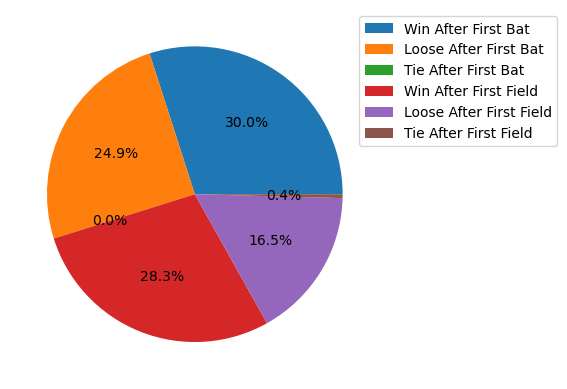

In [58]:
winning_after_bat_or_field()

11.Show venue wise how percentage of time a team win when they bat or field first

In [59]:
def citywise_winning_after_first_bat_or_field(City=None):
    if City==None:
        city_set=set(matches_copy['city'])
        for st in city_set:
            print(st,end=',')
        City=input('City=')
    else:
        City=City
        city_set=set(matches_copy['city'])
    if City in city_set:
        team_set=set(matches_copy.loc[matches_copy['city']==City]['team1']) | \
                 set(matches_copy.loc[matches_copy['city']==City]['team2'])
        for st in team_set:
            print(st,end=',')
        Team=input('Team=')
        if Team in team_set:
            a=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='runs') & \
              (matches_copy['city']==City)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
                    
            b=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
              (matches_copy['winner']!=Team) & (matches_copy['result']=='wickets') & (matches_copy['city']==City)])/\
               len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
            
            c=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat') & \
              (matches_copy['result']=='tie') & (matches_copy['city']==City)]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='field') \
              & (matches_copy['city']==City) & (matches_copy['result']=='tie')]))/len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
                    
            d=(len(matches_copy.loc[(matches_copy['winner']==Team) & (matches_copy['result']=='wickets') & \
              (matches_copy['city']==City)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
            
            e=(len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
              (matches_copy['winner']!=Team) & (matches_copy['result']=='runs') & \
              (matches_copy['city']==City)])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
                    
            f=((len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='field') & \
              (matches_copy['city']==City) & (matches_copy['result']=='tie')]) + len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['toss_winner']!=Team) & (matches_copy['toss_decision']=='bat') \
              & (matches_copy['result']=='tie') & (matches_copy['city']==City)]))/len(matches_copy.loc[((matches_copy['team1']==Team) | \
              (matches_copy['team2']==Team)) & (matches_copy['city']==City)]))*100
            
            plt.pie(x=[a,b,c,d,e,f],labels=None,autopct='%1.1f%%')
            plt.legend(labels=['Win After First Bat','Loose After First Bat','Tie After First Bat',\
                              'Win After First Field','Loose After First Field','Tie After First Field'],\
                               bbox_to_anchor=(1.5, 1),loc='upper right')
        else:
            print('Select Team from above list')
            citywise_winning_after_first_bat_or_field(City)
    else:
        print('Select City from above list')
        citywise_winning_after_first_bat_or_field()

Johannesburg,Nagpur,Kolkata,Mumbai,Durban,Kanpur,Raipur,Guwahati,Ranchi,Cuttack,Abu Dhabi,Indore,Cape Town,Port Elizabeth,Mohali,Pune,Bloemfontein,Chennai,Rajkot,Jaipur,Sharjah,Lucknow,Kimberley,Delhi,Visakhapatnam,Dubai,Navi Mumbai,Dharamsala,Kochi,Ahmedabad,Centurion,Chandigarh,East London,Hyderabad,Bangalore,Bengaluru,

City= Mumbai


Rising Pune Supergiant,Chennai Super Kings,Delhi Daredevils,Lucknow Super Giants,Deccan Chargers,Kings XI Punjab,Rajasthan Royals,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Capitals,Pune Warriors,Punjab Kings,Mumbai Indians,Rising Pune Supergiants,Gujarat Lions,Gujarat Titans,Royal Challengers Bengaluru,Kochi Tuskers Kerala,Sunrisers Hyderabad,

Team= Mumbai Indians


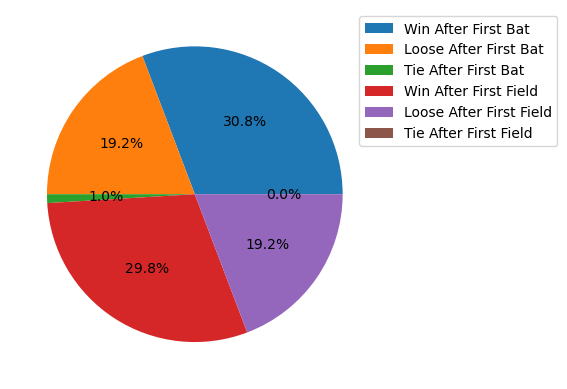

In [60]:
citywise_winning_after_first_bat_or_field()

12.Show year wise how percentage of time a team win

In [62]:
def winning_percentage(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(matches_copy['team1'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            z=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
               (matches_copy['result']!='tie') & (matches_copy['winner']==Team)])/\
              len(matches_copy.loc[(matches_copy['team1']==Team) | (matches_copy['team2']==Team)])*100
            
            y=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
               (matches_copy['result']!='tie') & (matches_copy['winner']!=Team)])/\
              len(matches_copy.loc[(matches_copy['team1']==Team) | (matches_copy['team2']==Team)])*100
            
            w=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
                  (matches_copy['result']=='tie')])/len(matches_copy.loc[((matches_copy['team1']==Team) | \
                  (matches_copy['team2']==Team))])*100
            plt.pie(x=[z,y,w],labels=['Win','Loose','Tie'],autopct='%1.1f%%')
        else:
            print('Choose Team from the above list')
            winning_percentage(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            winning_percentage()
        else:
            if 2008<=Year<=2024:
                Set=set(matches_copy.loc[matches_copy['year']==Year]['team1'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    z=len(matches_copy.loc[(matches_copy['year']==Year) & ((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['result']!='tie') & \
                      (matches_copy['winner']==Team)])/len(matches_copy.loc[(matches_copy['year']==Year) & \
                      ((matches_copy['team1']==Team) | (matches_copy['team2']==Team))])*100
            
                    y=len(matches_copy.loc[(matches_copy['year']==Year) & ((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['result']!='tie') & \
                      (matches_copy['winner']!=Team)])/len(matches_copy.loc[(matches_copy['year']==Year) & \
                      ((matches_copy['team1']==Team) | (matches_copy['team2']==Team))])*100
            
                    w=len(matches_copy.loc[(matches_copy['year']==Year) & ((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team)) & (matches_copy['result']=='tie')])/\
                      len(matches_copy.loc[(matches_copy['year']==Year) & ((matches_copy['team1']==Team) | \
                      (matches_copy['team2']==Team))])*100
                    plt.pie(x=[z,y,w],labels=['Win','Loose','Tie'],autopct='%1.1f%%')
                else:
                    print('Choose Team from the above list')
                    winning_percentage(Year)
            else:
                print('Choose between all or 2008 to 2024')
                winning_percentage()

Year= 2017


Gujarat Lions,Mumbai Indians,Kolkata Knight Riders,Rising Pune Supergiant,Kings XI Punjab,Delhi Daredevils,Royal Challengers Bangalore,Sunrisers Hyderabad,

Team= Rising Pune Supergiant


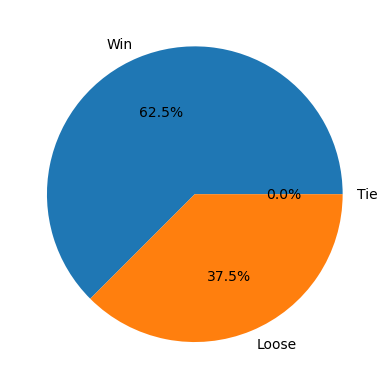

In [63]:
winning_percentage()

15.Average runs comparison between teams year wise

In [64]:
def loosing_team_after_bat(row):
    if row.team1==row.winner:
        return row.team2
    else:
        return row.team1

In [65]:
matches_copy['looser']=matches_copy.apply(func=loosing_team_after_bat,axis=1)

In [66]:
matches_copy['first_inn_runs']=matches_copy['target_runs'].map(lambda x:x-1)

In [67]:
matches_copy.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day', 'looser',
       'first_inn_runs'],
      dtype='object')

In [68]:
matches_copy.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_overs,super_over,method,umpire1,umpire2,year,month,day,looser,first_inn_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,20.0,N,No,Asad Rauf,RE Koertzen,2008,4,18,Royal Challengers Bangalore,222.0


In [69]:
matches_copy.loc[:,['toss_decision', 'winner','result', 'result_margin', 'target_runs']].head(1)

,toss_decision,winner,result,result_margin,target_runs
0,field,Kolkata Knight Riders,runs,140.0,223.0


In [70]:
def second_innings_run(row):
    if row['result']=='runs':
        return row['first_inn_runs']-row['result_margin']
    elif row['result']=='wicket':
        return row['target_runs']
    else:
        return row['first_inn_runs']

In [71]:
matches_copy['second_inn_runs']=matches_copy.apply(second_innings_run,axis=1)

In [72]:
matches_copy.loc[0,['second_inn_runs']]

second_inn_runs    82.0
Name: 0, dtype: object

In [73]:
total_runs_df1=matches_copy.loc[matches_copy['result']=='runs'].groupby(['winner','year'],as_index=False)\
['first_inn_runs'].mean()
total_runs_df1['team']=total_runs_df1['winner']
total_runs_df1['inn_runs']=total_runs_df1['first_inn_runs']
total_runs_df1.drop(['winner','first_inn_runs'],inplace=True,axis=1)

total_runs_df2=matches_copy.loc[matches_copy['result']=='wickets'].groupby(['looser','year'],as_index=False)\
['first_inn_runs'].mean()
total_runs_df2['team']=total_runs_df2['looser']
total_runs_df2['inn_runs']=total_runs_df2['first_inn_runs']
total_runs_df2.drop(['looser','first_inn_runs'],inplace=True,axis=1)

total_runs_df3=matches_copy.loc[matches_copy['result']=='tie'].groupby(['team1','year'],as_index=False)\
['first_inn_runs'].mean()
total_runs_df3['team']=total_runs_df3['team1']
total_runs_df3['inn_runs']=total_runs_df3['first_inn_runs']
total_runs_df3.drop(['team1','first_inn_runs'],inplace=True,axis=1)

total_runs_df4=matches_copy.loc[matches_copy['result']=='tie'].groupby(['team2','year'],as_index=False)\
['second_inn_runs'].mean()
total_runs_df4['team']=total_runs_df4['team2']
total_runs_df4['inn_runs']=total_runs_df4['second_inn_runs']
total_runs_df4.drop(['team2','second_inn_runs'],inplace=True,axis=1)

total_runs_df5=matches_copy[matches_copy['result']=='runs'].groupby(['looser','year'],as_index=False)\
['second_inn_runs'].mean()
total_runs_df5['team']=total_runs_df5['looser']
total_runs_df5['inn_runs']=total_runs_df5['second_inn_runs']
total_runs_df5.drop(['looser','second_inn_runs'],inplace=True,axis=1)

total_runs_df6=matches_copy[matches_copy['result']=='wickets'].groupby(['winner','year'],as_index=False)\
['second_inn_runs'].mean()
total_runs_df6['team']=total_runs_df6['winner']
total_runs_df6['inn_runs']=total_runs_df6['second_inn_runs']
total_runs_df6.drop(['winner','second_inn_runs'],inplace=True,axis=1)

total_runs_df=pd.concat([total_runs_df1,total_runs_df2,total_runs_df3,total_runs_df4,total_runs_df5,total_runs_df6]\
                        ,axis=0,ignore_index=True)
total_runs_df=total_runs_df.groupby(['team','year'],as_index=False)['inn_runs'].mean()

In [74]:
total_runs_df6.head()

,year,team,inn_runs
0,2008,Chennai Super Kings,148.250000
1,2009,Chennai Super Kings,143.500000
2,2010,Chennai Super Kings,169.250000
3,2011,Chennai Super Kings,154.333333
4,2012,Chennai Super Kings,149.800000


In [75]:
total_runs_df

,team,year,inn_runs
0,Chennai Super Kings,2008,156.187500
1,Chennai Super Kings,2009,156.958333
2,Chennai Super Kings,2010,155.383333
3,Chennai Super Kings,2011,143.583333
4,Chennai Super Kings,2012,156.678571
...,...,...,...
141,Sunrisers Hyderabad,2020,158.000000
142,Sunrisers Hyderabad,2021,147.266667
143,Sunrisers Hyderabad,2022,166.458333
144,Sunrisers Hyderabad,2023,177.200000


In [76]:
def avg_run_comparison():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.barplot(data=total_runs_df,x='inn_runs',y='team',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Year between all or 2008 to 2024')
            avg_run_comparison()
        else:
            if 2008<=Year<=2024:
                sns.barplot(data=total_runs_df.loc[total_runs_df['year']==Year],x='inn_runs',\
                            y='team',orient='h')
            else:
                print('Year between 2008 to 2024')
                avg_run_comparison()

Year= 2015


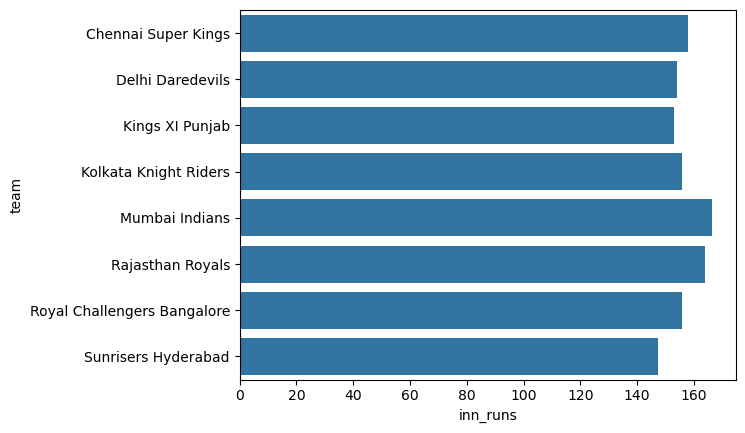

In [77]:
avg_run_comparison()

16.Yearwise average runs for each venue

In [78]:
total_runs_citywise1=matches_copy.loc[matches_copy['result']=='runs']\
.groupby(['city','winner','year'],as_index=False)['first_inn_runs'].mean()
total_runs_citywise1['team']=total_runs_citywise1['winner']
total_runs_citywise1['inn_runs']=total_runs_citywise1['first_inn_runs']
total_runs_citywise1.drop(['winner','first_inn_runs'],inplace=True,axis=1)

total_runs_citywise2=matches_copy.loc[matches_copy['result']=='wickets'].\
groupby(['city','looser','year'],as_index=False)['first_inn_runs'].mean()
total_runs_citywise2['team']=total_runs_citywise2['looser']
total_runs_citywise2['inn_runs']=total_runs_citywise2['first_inn_runs']
total_runs_citywise2.drop(['looser','first_inn_runs'],inplace=True,axis=1)

total_runs_citywise3=matches_copy.loc[matches_copy['result']=='tie']\
.groupby(['city','team1','year'],as_index=False)['first_inn_runs'].mean()
total_runs_citywise3['team']=total_runs_citywise3['team1']
total_runs_citywise3['inn_runs']=total_runs_citywise3['first_inn_runs']
total_runs_citywise3.drop(['team1','first_inn_runs'],inplace=True,axis=1)

total_runs_citywise4=matches_copy.loc[matches_copy['result']=='tie']\
.groupby(['city','team2','year'],as_index=False)['second_inn_runs'].mean()
total_runs_citywise4['team']=total_runs_citywise4['team2']
total_runs_citywise4['inn_runs']=total_runs_citywise4['second_inn_runs']
total_runs_citywise4.drop(['team2','second_inn_runs'],inplace=True,axis=1)

total_runs_citywise5=matches_copy[matches_copy['result']=='runs'].groupby(['city','looser','year'],as_index=False)\
['second_inn_runs'].mean()
total_runs_citywise5['team']=total_runs_citywise5['looser']
total_runs_citywise5['inn_runs']=total_runs_citywise5['second_inn_runs']
total_runs_citywise5.drop(['looser','second_inn_runs'],inplace=True,axis=1)

total_runs_citywise6=matches_copy[matches_copy['result']=='wickets'].groupby(['city','winner','year'],as_index=False)\
['second_inn_runs'].mean()
total_runs_citywise6['team']=total_runs_citywise6['winner']
total_runs_citywise6['inn_runs']=total_runs_citywise6['second_inn_runs']
total_runs_citywise6.drop(['winner','second_inn_runs'],inplace=True,axis=1)

total_runs_citywise=pd.concat([total_runs_citywise1,total_runs_citywise2,\
                               total_runs_citywise3,total_runs_citywise4,\
                               total_runs_citywise5,total_runs_citywise6],axis=0,ignore_index=True)
total_runs_citywise=total_runs_citywise.groupby(['city','team','year'],as_index=False)['inn_runs'].mean()

In [79]:
total_runs_citywise.head(2)

,city,team,year,inn_runs
0,Abu Dhabi,Chennai Super Kings,2014,191.0
1,Abu Dhabi,Chennai Super Kings,2020,146.5


In [80]:
len(total_runs_citywise)

1088

In [81]:
def avg_run_comparison(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(matches_copy['city'])
        for st in Set:
            print(st,end=',')
        City=input('City=')
        if City in Set:
            sns.barplot(data=total_runs_citywise.loc[total_runs_citywise['city']==City],\
                    x='inn_runs',y='team',orient='h')
        else:
            print('Choose city from above list')
            avg_run_comparison(Year)
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Year between all or 2008 to 2024')
            avg_run_comparison()
        else:
            if 2008<=Year<=2024:
                Set=set(matches_copy.loc[matches_copy['year']==Year]['city'])
                for st in Set:
                    print(st,end=',')
                City=input('City=')
                if City in Set:
                    sns.barplot(data=total_runs_citywise.loc[(total_runs_citywise['city']==City)\
                                & (total_runs_citywise['year']==Year)],x='inn_runs',y='team',orient='h')
                else:
                    print('Choose city from above list')
                    avg_run_comparison(Year)
            else:
                print('Year between 2008 to 2024')
                avg_run_comparison()

Year= 2014


Cuttack,Kolkata,Mumbai,Sharjah,Ahmedabad,Abu Dhabi,Delhi,Chandigarh,Dubai,Hyderabad,Ranchi,Bangalore,

City= Dubai


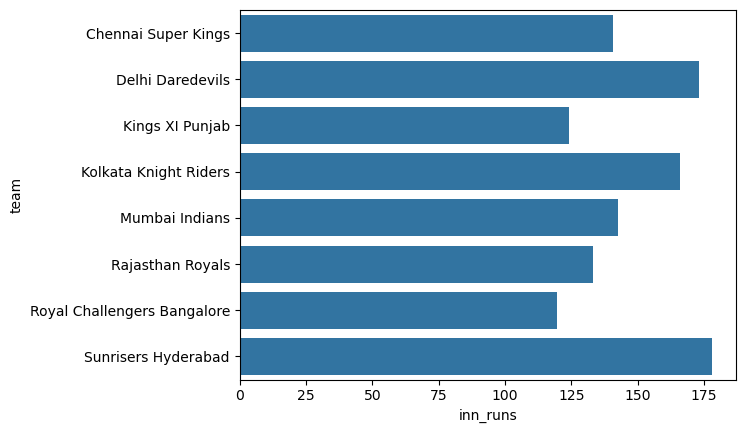

In [82]:
avg_run_comparison()